<a href="https://colab.research.google.com/github/poperskop/heart_desease/blob/main/heartdesiase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.8 MB/s eta 0:00:00


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
def get_summary(df):

    df_desc = pd.DataFrame(df.describe(include='all').T)
    df_summary = pd.DataFrame({'dtype': df.dtypes,
                              'unique':df.nunique().values,
                              'missing': df.isna().sum().values,
                              'duplicates': df.duplicated().sum(),
                               'min': df_desc['min'].values,
                               'max': df_desc['max'].values,
                               'avg': df_desc['mean'].values,
                               'std dev': df_desc['std'].values})

    return df_summary

get_summary(df).style.background_gradient(cmap='viridis_r',low=0.8)

,dtype,unique,missing,duplicates,min,max,avg,std dev
age,int64,41,0,723,29.000000,77.000000,54.434146,9.072290
sex,int64,2,0,723,0.000000,1.000000,0.695610,0.460373
cp,int64,4,0,723,0.000000,3.000000,0.942439,1.029641
trestbps,int64,49,0,723,94.000000,200.000000,131.611707,17.516718
chol,int64,152,0,723,126.000000,564.000000,246.000000,51.592510
fbs,int64,2,0,723,0.000000,1.000000,0.149268,0.356527
restecg,int64,3,0,723,0.000000,2.000000,0.529756,0.527878
thalach,int64,91,0,723,71.000000,202.000000,149.114146,23.005724
exang,int64,2,0,723,0.000000,1.000000,0.336585,0.472772
oldpeak,float64,40,0,723,0.000000,6.200000,1.071512,1.175053


In [ ]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
digit_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
df = df.drop_duplicates()

In [ ]:
get_summary(df).style.background_gradient(cmap='viridis_r',low=0.8)

,dtype,unique,missing,duplicates,min,max,avg,std dev
age,int64,41,0,0,29.000000,77.000000,54.420530,9.047970
sex,int64,2,0,0,0.000000,1.000000,0.682119,0.466426
cp,int64,4,0,0,0.000000,3.000000,0.963576,1.032044
trestbps,int64,49,0,0,94.000000,200.000000,131.602649,17.563394
chol,int64,152,0,0,126.000000,564.000000,246.500000,51.753489
fbs,int64,2,0,0,0.000000,1.000000,0.149007,0.356686
restecg,int64,3,0,0,0.000000,2.000000,0.526490,0.526027
thalach,int64,91,0,0,71.000000,202.000000,149.569536,22.903527
exang,int64,2,0,0,0.000000,1.000000,0.327815,0.470196
oldpeak,float64,40,0,0,0.000000,6.200000,1.043046,1.161452


In [ ]:
lcolumns = (df.nunique() > 2).index

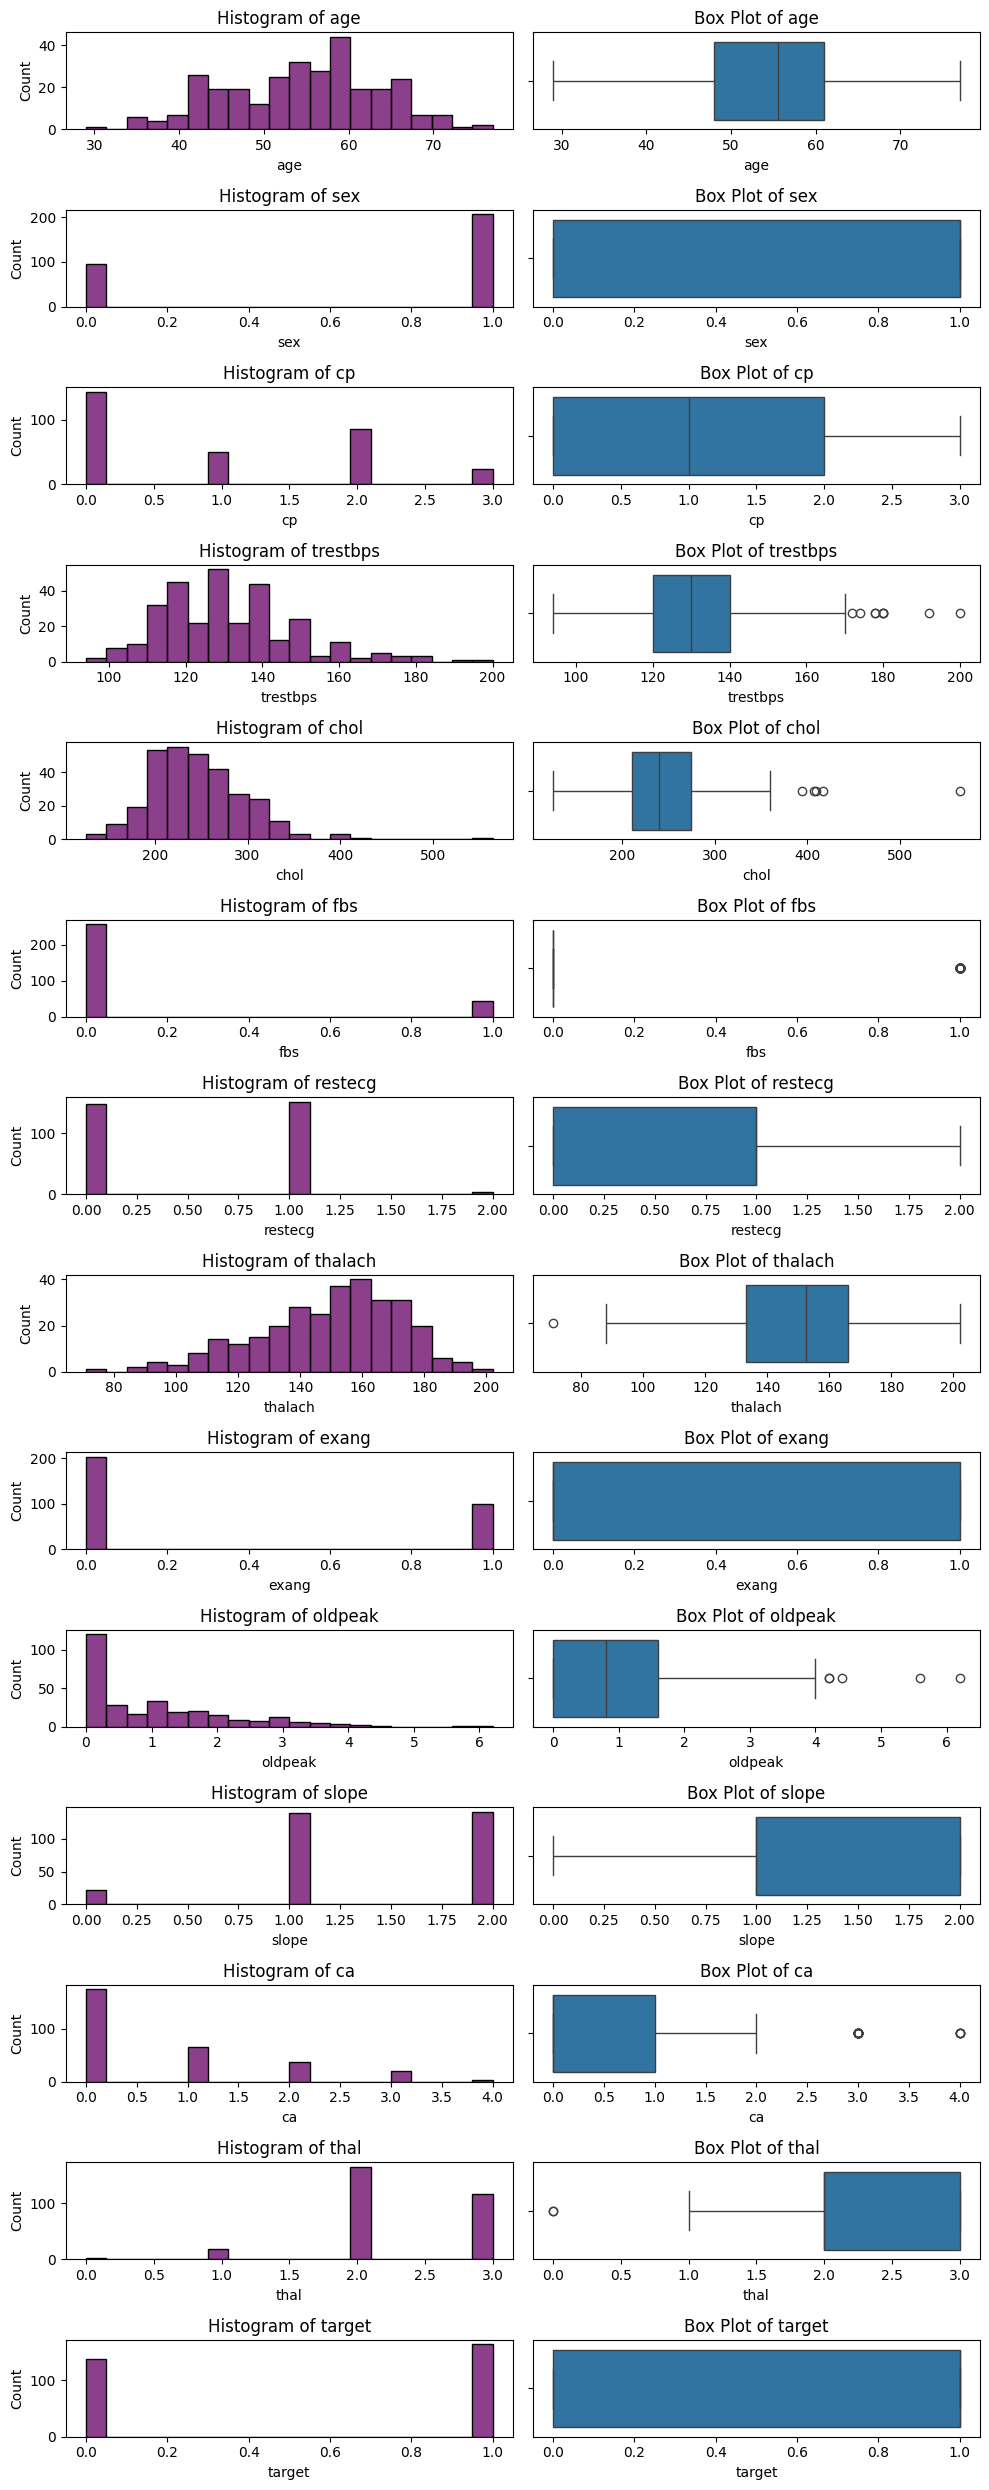

In [ ]:
fig, ax = plt.subplots(nrows=len(lcolumns), ncols=2, figsize=(10, 25))
axes = ax.flatten()

for i, col in enumerate(lcolumns):
    # Histogram plot
    sns.histplot(data=df, x=df[col], bins=20, ax=axes[2*i], color='#660066')
    axes[2*i].set_title(f'Histogram of {col}')

    # Box plot
    sns.boxplot(data=df, x=df[col], ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

<Axes: >

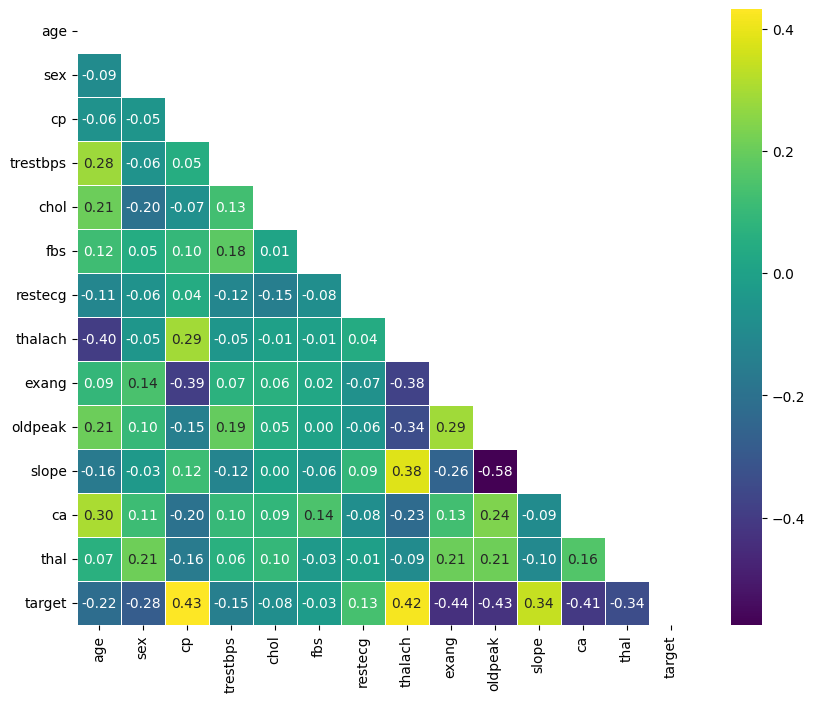

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, linewidths=0.7,annot=True,square=True,fmt='.2f', cmap='viridis')

In [42]:
features = df.drop('target', axis=1)
target = df.target

In [40]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)

print(X_train.shape, X_test.shape)

(211, 13) (91, 13)


In [46]:
from sklearn.metrics import recall_score, accuracy_score

In [54]:
baseline = lambda x: np.zeros(x.shape)

rec = recall_score(y_test, baseline(y_test))
ac = accuracy_score(y_test, baseline(y_test))

In [55]:
scores = pd.DataFrame({'accuracy': [ac], 'recall': [rec]}, index=['base'])
scores

,accuracy,recall
base,0.505495,0.0


In [72]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(X_train, y_train)
preds = cat.predict(X_test)

rec = recall_score(y_test, preds)
ac = accuracy_score(y_test, preds)

scores.loc['catboost'] = [ac, rec]

Learning rate set to 0.005302
0:	learn: 0.6879153	total: 1.29ms	remaining: 1.29s
1:	learn: 0.6832902	total: 2.79ms	remaining: 1.39s
2:	learn: 0.6791392	total: 4.05ms	remaining: 1.34s
3:	learn: 0.6744350	total: 5.57ms	remaining: 1.39s
4:	learn: 0.6700748	total: 6.88ms	remaining: 1.37s
5:	learn: 0.6653375	total: 8.09ms	remaining: 1.34s
6:	learn: 0.6625333	total: 9.57ms	remaining: 1.36s
7:	learn: 0.6584065	total: 10.8ms	remaining: 1.33s
8:	learn: 0.6542520	total: 12ms	remaining: 1.32s
9:	learn: 0.6500426	total: 13.1ms	remaining: 1.3s
10:	learn: 0.6463944	total: 14.5ms	remaining: 1.3s
11:	learn: 0.6427391	total: 16.1ms	remaining: 1.32s
12:	learn: 0.6385105	total: 17.6ms	remaining: 1.34s
13:	learn: 0.6352659	total: 19.3ms	remaining: 1.36s
14:	learn: 0.6314653	total: 20.8ms	remaining: 1.37s
15:	learn: 0.6271600	total: 22.1ms	remaining: 1.36s
16:	learn: 0.6237096	total: 23.3ms	remaining: 1.35s
17:	learn: 0.6198252	total: 24.5ms	remaining: 1.34s
18:	learn: 0.6164100	total: 25.7ms	remaining: 1.

In [90]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)
preds = forest.predict(X_test)

rec = recall_score(y_test, preds)
ac = accuracy_score(y_test, preds)

scores.loc['forest'] = [ac, rec]

In [91]:
scores.sort_values(by='recall', ascending=False)

,accuracy,recall
forest,0.780220,0.911111
catboost,0.769231,0.888889
f_forest,0.769231,0.888889
base,0.505495,0.000000


In [95]:
params = {'n_estimators': np.arange(100, 180, 10),
          'max_depth': np.arange(6, 20, 2)}

In [97]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(forest, params, scoring='recall')
search.fit(X_train, y_train)
final_forest = search.best_estimator_
preds = final_forest.predict(X_test)

rec = recall_score(y_test, preds)
ac = accuracy_score(y_test, preds)

scores.loc['f_forest'] = [ac, rec]

In [98]:
scores.sort_values(by='recall', ascending=False)

,accuracy,recall
forest,0.780220,0.911111
f_forest,0.780220,0.911111
catboost,0.769231,0.888889
base,0.505495,0.000000
